# Command line tools
$\phantom{\xi}$

In addition to the Python objects presented in previous sections, pyALF offers a set of scripts that make it easy to leverage pyALF from a Unix shell (e.g. Bash or zsh).
They are located in the folder `py_alf/cli`, but installation via `pip` adds entry points to conveniently use them from the Unix shell without further configuration (notably, by trimming the trailing `.py`).

The list of all command line tools can be found in the {doc}`reference <../reference/cli>`. Out of those, this section will only introduce two more elaborate scripts, namely `alf_run` and `alf_postprocess`.

When starting a code line in Jupyter with an exclamation mark, the line will be interpreted as a shell command. 
We will use this feature to demonstrate the shell tools.

## alf_run

The script `alf_run.py` enables most of the features displayed in {numref}`seq:pyalf_comprun` to be used directly from the shell. The help text lists all possible arguments:

In [1]:
!alf_run -h

usage: alf_run [-h] [--alfdir ALFDIR] [--sims_file SIMS_FILE]
               [--branch BRANCH] [--machine MACHINE] [--mpi] [--n_mpi N_MPI]
               [--mpiexec MPIEXEC] [--mpiexec_args MPIEXEC_ARGS]
               [--do_analysis]

Helper script for compiling and running ALF.

options:
  -h, --help            show this help message and exit
  --alfdir ALFDIR       Path to ALF directory. (default: os.getenv('ALF_DIR',
                        './ALF')
  --sims_file SIMS_FILE
                        File defining simulations parameters. Each line starts
                        with the Hamiltonian name and a comma, after wich
                        follows a dict in JSON format for the parameters. A
                        line that says stop can be used to interrupt.
                        (default: './Sims')
  --branch BRANCH       Git branch to checkout.
  --machine MACHINE     Machine configuration (default: 'GNU')
  --mpi                 mpi run
  --n_mpi N_MPI         number o

For example, to run a series of four different simulations of the Kondo model, the first step is to create a file specifying the parameters, with one line per simulation:

In [2]:
!cat Sims_Kondo

Kondo, {"L1": 4, "L2": 4, "Ham_JK": 0.5}
Kondo, {"L1": 4, "L2": 4, "Ham_JK": 1.0}
Kondo, {"L1": 4, "L2": 4, "Ham_JK": 1.5}
Kondo, {"L1": 4, "L2": 4, "Ham_JK": 2.0}


Then, one can execute `alf_run.py` with options as desired, the script automatically recompiles ALF for each simulation. For understanding some of the options, {numref}`seq:pyalf_comprun` might help.

In [3]:
!alf_run --sims_file ./Sims_Kondo --mpi --n_mpi 4

Number of simulations: 4


Compiling ALF... 
Cleaning up Prog/
Cleaning up Libraries/


Cleaning up Analysis/
Compiling Libraries


ar: creating modules_90.a


ar: creating libqrref.a
Compiling Analysis


Compiling Program
Parsing Hamiltonian parameters
filenames: Hamiltonians/Hamiltonian_Kondo_smod.F90 Hamiltonians/Hamiltonian_Kondo_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_smod.F90 Hamiltonians/Hamiltonian_Hubbard_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90 Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_tV_smod.F90 Hamiltonians/Hamiltonian_tV_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_LRC_smod.F90 Hamiltonians/Hamiltonian_LRC_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90 Hamiltonians/Hamiltonian_Z2_Matter_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90 Hamiltonians/Hamiltonian_Spin_Peierls_read_write_parameters.F90
Compiling program modules


Link program


Done.
Prepare directory "/home/jonas/Programs/pyALF/doc/source/usage/ALF_data/Kondo_L1=4_L2=4_JK=0.5" for Monte Carlo run.
Create new directory.


Run /home/jonas/Programs/ALF/Prog/ALF.out


 ALF Copyright (C) 2016 - 2022 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
 No initial configuration


Compiling ALF... 
Cleaning up Prog/


Cleaning up Libraries/
Cleaning up Analysis/
Compiling Libraries


ar: creating modules_90.a


ar: creating libqrref.a
Compiling Analysis


Compiling Program
Parsing Hamiltonian parameters
filenames: Hamiltonians/Hamiltonian_Kondo_smod.F90 Hamiltonians/Hamiltonian_Kondo_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_smod.F90 Hamiltonians/Hamiltonian_Hubbard_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90 Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_tV_smod.F90 Hamiltonians/Hamiltonian_tV_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_LRC_smod.F90 Hamiltonians/Hamiltonian_LRC_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90 Hamiltonians/Hamiltonian_Z2_Matter_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90 Hamiltonians/Hamiltonian_Spin_Peierls_read_write_parameters.F90


Compiling program modules


Link program


Done.
Prepare directory "/home/jonas/Programs/pyALF/doc/source/usage/ALF_data/Kondo_L1=4_L2=4_JK=1.0" for Monte Carlo run.
Create new directory.


Run /home/jonas/Programs/ALF/Prog/ALF.out


 ALF Copyright (C) 2016 - 2022 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
 No initial configuration


Compiling ALF... 
Cleaning up Prog/


Cleaning up Libraries/
Cleaning up Analysis/


Compiling Libraries


ar: creating modules_90.a


ar: creating libqrref.a
Compiling Analysis


Compiling Program
Parsing Hamiltonian parameters


filenames: Hamiltonians/Hamiltonian_Kondo_smod.F90 Hamiltonians/Hamiltonian_Kondo_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_smod.F90 Hamiltonians/Hamiltonian_Hubbard_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90 Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_tV_smod.F90 Hamiltonians/Hamiltonian_tV_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_LRC_smod.F90 Hamiltonians/Hamiltonian_LRC_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90 Hamiltonians/Hamiltonian_Z2_Matter_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90 Hamiltonians/Hamiltonian_Spin_Peierls_read_write_parameters.F90
Compiling program modules


Link program


Done.
Prepare directory "/home/jonas/Programs/pyALF/doc/source/usage/ALF_data/Kondo_L1=4_L2=4_JK=1.5" for Monte Carlo run.
Create new directory.


Run /home/jonas/Programs/ALF/Prog/ALF.out


 ALF Copyright (C) 2016 - 2022 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
 No initial configuration


Compiling ALF... 
Cleaning up Prog/


Cleaning up Libraries/
Cleaning up Analysis/


Compiling Libraries


ar: creating modules_90.a


ar: creating libqrref.a
Compiling Analysis


Compiling Program
Parsing Hamiltonian parameters


filenames: Hamiltonians/Hamiltonian_Kondo_smod.F90 Hamiltonians/Hamiltonian_Kondo_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_smod.F90 Hamiltonians/Hamiltonian_Hubbard_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_smod.F90 Hamiltonians/Hamiltonian_Hubbard_Plain_Vanilla_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_tV_smod.F90 Hamiltonians/Hamiltonian_tV_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_LRC_smod.F90 Hamiltonians/Hamiltonian_LRC_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Z2_Matter_smod.F90 Hamiltonians/Hamiltonian_Z2_Matter_read_write_parameters.F90
filenames: Hamiltonians/Hamiltonian_Spin_Peierls_smod.F90 Hamiltonians/Hamiltonian_Spin_Peierls_read_write_parameters.F90
Compiling program modules


Link program


Done.
Prepare directory "/home/jonas/Programs/pyALF/doc/source/usage/ALF_data/Kondo_L1=4_L2=4_JK=2.0" for Monte Carlo run.
Create new directory.


Run /home/jonas/Programs/ALF/Prog/ALF.out


 ALF Copyright (C) 2016 - 2022 The ALF project contributors
 This Program comes with ABSOLUTELY NO WARRANTY; for details see license.GPL
 This is free software, and you are welcome to redistribute it under certain conditions.
 No initial configuration


Done


## alf_postprocess

The script `alf_postprocess.py` enables most of the features discussed in {numref}`seq:pyalf_posprocess`, except for plotting capabilities, to be used directly from the shell. The help text lists all possible arguments:

In [4]:
!alf_postprocess -h

usage: alf_postprocess [-h] [--check_warmup] [--check_rebin]
                       [-l CHECK_LIST [CHECK_LIST ...]] [--do_analysis]
                       [--always] [--gather] [--no_tau]
                       [--custom_obs CUSTOM_OBS] [--symmetry SYMMETRY]
                       [directories ...]

Script for postprocessing Monte Carlo bins.

positional arguments:
  directories           Directories to analyze. If empty, analyzes all
                        directories containing file "data.h5" it can find,
                        starting from the current working directory.

options:
  -h, --help            show this help message and exit
  --check_warmup, --warmup
                        Check warmup. Opens new window.
  --check_rebin, --rebin
                        Check rebinning for controlling autocorrelation. Opens
                        new window.
  -l, --check_list CHECK_LIST [CHECK_LIST ...]
                        List of observables to check for warmup and rebinning.
 

To use the symmetrization feature, one needs a file defining the object `symmetry`, similar to the already used file `custom_obs.py` defining `custom_obs`.

In [5]:
!cat sym_c4.py

"""Define C_4 symmetry (=fourfold rotation) for pyALF analysis."""
from math import pi


# Define list of transformations (Lattice, i) -> new_i
# Default analysis will average over all listed elements
def sym_c4_0(latt, i): return i
def sym_c4_1(latt, i): return latt.rotate(i, pi*0.5)
def sym_c4_2(latt, i): return latt.rotate(i, pi)
def sym_c4_3(latt, i): return latt.rotate(i, pi*1.5)

symmetry = [sym_c4_0, sym_c4_1, sym_c4_2, sym_c4_3]


To analyze the results from the Kondo model and gather them all in one file `gathered.pkl`, we execute the following command.

In [6]:
!alf_postprocess --custom_obs custom_obs.py --symmetry sym_c4.py --ana --gather ALF_data/Kondo*

### Analyzing ALF_data/Kondo_L1=4_L2=4_JK=0.5 ###
/home/jonas/Programs/pyALF/doc/source/usage


Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom SpinZ_pipi ['SpinZ_eq']


Scalar observables:
Constraint_scal
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Dimer_eq
Green_eq
SpinZ_eq


Time displaced observables:
Den_tau
Dimer_tau
Green_tau
Greenf_tau
SpinZ_tau


### Analyzing ALF_data/Kondo_L1=4_L2=4_JK=1.0 ###
/home/jonas/Programs/pyALF/doc/source/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom SpinZ_pipi ['SpinZ_eq']
Scalar observables:
Constraint_scal
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Dimer_eq
Green_eq
SpinZ_eq


Time displaced observables:
Den_tau
Dimer_tau
Green_tau
Greenf_tau
SpinZ_tau


### Analyzing ALF_data/Kondo_L1=4_L2=4_JK=1.5 ###
/home/jonas/Programs/pyALF/doc/source/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom SpinZ_pipi ['SpinZ_eq']
Scalar observables:
Constraint_scal
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Dimer_eq
Green_eq
SpinZ_eq
Time displaced observables:
Den_tau


Dimer_tau
Green_tau
Greenf_tau
SpinZ_tau
### Analyzing ALF_data/Kondo_L1=4_L2=4_JK=2.0 ###
/home/jonas/Programs/pyALF/doc/source/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']


custom SpinZ_pipi ['SpinZ_eq']
Scalar observables:
Constraint_scal
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Dimer_eq
Green_eq
SpinZ_eq
Time displaced observables:
Den_tau
Dimer_tau


Green_tau
Greenf_tau
SpinZ_tau
ALF_data/Kondo_L1=4_L2=4_JK=0.5
No orbital locations saved.
ALF_data/Kondo_L1=4_L2=4_JK=1.0
No orbital locations saved.
ALF_data/Kondo_L1=4_L2=4_JK=1.5
No orbital locations saved.
ALF_data/Kondo_L1=4_L2=4_JK=2.0
No orbital locations saved.


The data from `gathered.pkl` can, for example, be read and plotted like this:

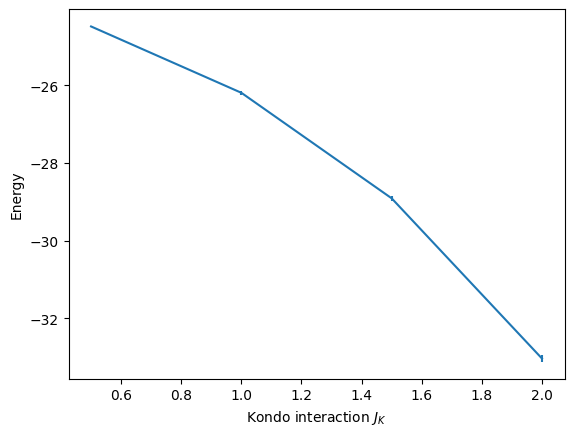

In [7]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load pickled DataFrame
res = pd.read_pickle('gathered.pkl')

# Create figure with axis labels
fig, ax = plt.subplots()
ax.set_xlabel(r'Kondo interaction $J_K$')
ax.set_ylabel(r'Energy')

# Plot data
ax.errorbar(res.ham_jk, res.Ener_scal0, res.Ener_scal0_err);